&copy; Bedzyk Research Group 2020, Northwestern University

<div class="alert alert-block alert-warning">
To start this project, in the top menu bar click $\text{Cell}\to \text{ Run All}$. Then, scroll back up to the top of this document.
</div>

In [1]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


<div class="alert alert-block alert-warning">
Raw code is hidden by default for the entire notebook. You can toggle on/off the raw code for this entire notebook by clicking the button above. More importantly, raw code for individual cells can be shown/hidden by using the message/button: <img src="images/show_hide_button.png"/> Hiding the code is mainly for visual purposes and may be useful if you would like a hard copy (i.e. pdf) of this document. However, there are also instances where you will need to show the code cell so you can input different parameters. This button will show up repeatedly throughout this document. Try showing and hiding the code in the cell block below as an example.
</div>

In [2]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# Jupyter Notebook Introduction

Jupyter Notebook is a an open source web application/user interface that allows users to create and share documents containing code, equations, visualizations, and narrative text by using a combination of different programming languages. In this Jupyter Notebook (*XRR.ipynb*), we will be using **Python 3** for all analysis purposes (in the top right corner of this page, you will see the tag Python 3 which tells you the programming language of the notebook). The most important concept of Jupyter Notebooks is the concept of a **cell block**. Clicking on a block of text or code will highlight (in blue in this case) the current cell block you are viewing. Click on this block of text. In the menu bar at the top of this document, you will see a drop down menu: <img src="images/markdown_dropdown.png"/> 

**Markdown** is referring the type of this cell block. Markdown is a text formatting language supported in Jupyter Notebook. By *double clicking* on the text you are reading right now, you will see the Markdown version of the cell block. You will see the other types of supported cell blocks by clicking the drop down menu. For example, "Code" is another type of cell block you will be seeing in this document and they all contain snippets of Python 3 code. 

To run code of a particular cell block, click into the cell and either click the run button above: 

<img src="images/run_jupyter.png"/>

or click "Shift+Enter" on your keyboard. Running a cell will also allow you to exit the "code view" version of a Markdown cell block. 

That is all you will need to know for this laboratory exercise. Have fun and we welcome any positive/negative feedback!

>**NOTE:** *Do not worry if you do not know Python or Markdown as there is no coding necessary for completing this project. In fact, most code cells can be left hidden for the entire exercise and you never even have to see code!*

# Re-accessing X-ray Lab Server

<div class="alert alert-block alert-danger">
Before beginning, make sure to locate your netID folder. This is where you will be saving all of your data. You should have already created a folder during the X-ray Reflectivity Exercise (Lab 1).

<br/>
    
In general, to save a scan: $\text{ Right click on scan } \to \text{ Save data }\to \text{ to File}$ 
<br/><br/>
On the lab computer, the location of the server is:
<br/><br/>
$\text{This PC} \to \text{mrc_xrayfac (\\\\resfiles.northwestern.edu)(Z:)} \to \text{netID folders} \to \text{[your_net_ID]}$

    
You may also wish to mount the server onto your computer. Click the following link and follow the appropriate steps if you would like to do so:
>https://kb.northwestern.edu/page.php?id=70525

For further clarification, see *XRR.ipynb* in this same directory.

 
</div>

# *Before You Begin...*
Please verify what SmartLab model you are using. In the cell block below, please click on the machine and software that corresponds to your SmartLab. You will see a screen shot of the software for the machine you click on.

After selecting, navigate into the cell block below the screen shot. Click $\text{Cell}\to \text{ Run All Below}$ to update the instructions tailored to your machine.

Most of the lab will be performed within the *Pro/Manual Control* window of the Smartlab softwares (circled in red in the screenshots).

In [3]:
display(tag)

machine_toggle_1 = widgets.ToggleButton(
    value=False,
)

machine_button_1 = widgets.Button(
    description='Smartlab Gen 1, Guidance',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

machine_toggle_2 = widgets.ToggleButton(
    value=False,
)

machine_button_2 = widgets.Button(
    description='Smartlab Gen 2, Studio II',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

#defining what the button will do on clicking: output a screenshot of each software
def on_button_clicked_machine_1(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = True
    machine_toggle_2.value = False
    display(Image(filename='images/guidance_3.png'))   
def on_button_clicked_machine_2(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = False
    machine_toggle_2.value = True
    display(Image(filename='images/studio_II_3.png'))
    

machine_button_1.on_click(on_button_clicked_machine_1)
machine_button_2.on_click(on_button_clicked_machine_2)
        
#displaying the buttons for the two types of machines
machine_button_layout = widgets.Layout(align_items='center')
machines = widgets.VBox(children=[machine_button_1,machine_button_2],layout=machine_button_layout)
display(machines)

# Click $\text{Cell}\to \text{Run  All  Below}$ when inside of this cell after selecting your instrument.

<br/><br/>
<div align="center">
<font size="18" color="#990000"><b> Thin Film <br/> <br/> Off-Specular X-ray Diffraction </b></font>
</div>

# Overview of the technique

Lab 2 (HRXRD Specular) established the out-of-plane lattice orientation with respect to the substrate ($\alpha$ $\text{Al}_2\text{O}_3$ (006)) (Pt (111) or $\alpha$ Fe2O3 (006) parallel to $\alpha$ $\text{Al}_2\text{O}_3$ (006)). You also determined domain size and strain (i.e. d-spacing). In lab 3, we will find if the film in-plane lattice vectors of the film and substrate are aligned (versus out-of-plane as done in lab 2). This exercise is to prove that the film is indeed an epitaxial film. The film could in fact be *textured*. If the film had a definite orientation in the out of plane direction, it could be that the film was textured such that in-plane domains were random. You should find that the film is not textured but has in plane epitaxial relation to the underlying substrate. To do this, we need to move the diffractometer axis such that we can line up off-specular Bragg peaks.

Prior to the lab, you need to plan this exercise by using CrystalMaker and subsidiary program SingleCrystal to judicioulsy locate *families* of off-specular Bagg peaks. $\phi$ scans about the $c$ axis at fixed $\chi$ and $2\theta / \omega$ at specified (hkl) Bragg reflections will give you the in-plane orientation of the film to substrate. You should have used Single Crystal to determine what off-specular film and substrate (hkl) reflections you will target for this exercise.

To do the $\phi$ scan and hit each of the reflections in a given family, you need to first align the $\text{Al}_2\text{O}_3$ G$_{(006)}$ along the $\phi$ axis by adjusting R$_x$ and R$_y$ at the $2\theta / \omega$ value of the sapphire (006) peak.

<div align="center">
<FIGURE> 
   <img src="images/Fig1_HXRD_SmartLab_v2.png" />
   <FIGCAPTION> <b>Fig. 1:</b> <i> SmartLab Diffractometer with Ge (220) 2-bounce monochromator option inserted to increase the resolution. 
</FIGURE>
</div>


## 1. CrystalMaker and SingleCrystal

If you have not already done so, install *CrystalMaker* and *SingleCrystal* (you may as well install *CrystalDiffract* as well, but we will not be using that application here).
> https://www.mccormick.northwestern.edu/materials-science/crystalmaker/

**NOTE**: There is no Linux distribution avaialble for the CrystalMaker Suite softwares.

Open up CrystalMaker

In <strong>Single Crystal</strong>, in top menu bar, select Diffraction -> Select X-ray and Weighted Reciprocal Lattice

Then set direcion to (0 0 6) (or (0 0 1)) within the Single Crystal window

Go to layer 4

Click Stereogram, make sure view Stereogram is selected

Click on an (hkl) pole that you have entered (have to figure out what pole you will be looking for)

Notice that when you look at stereographic projections, it will give you value of elevation angle and its bearing angle. The elevation angle is the compliment of $\chi$ on the SmartLab diffractometer ($\chi$ is tilt, see figure). The bearing angle is equivalent to the $\phi$ (azimuthal) angle plus some offset in $\phi$. Also in SingleCrystal, you can find the $2\theta$ value if you eneter $\lambda = 1.5405 \text{ nm}$ and your $\omega$ value will be $\frac{1}{2}2\theta$

Within the Stereogram in Single Crystal, record the bearing (relative $\phi$, absolute determined once we find a peak) and the elevation (90 - $\chi$). Make sure you pick (hkl) that are sufficiently strong. This you can see by selecting the point in the Single Crystal weighted reciprocal lattice. You will find $\frac{I}{I{_\text{max}}}$. Also within the weighted reciprocal lattice, you will find a $2\theta$ value. Also make sure they are sufficiently off-specular.
- Example: For $\text{Al}_2\text{O}_3$, ($\bar{1} 1 4$), bearing = 90 (+n120), elevation = 51.8 (family = ($0\bar{1}4$) and ($104$)), 3 fold $\phi$ scan at $\chi = 90 - 51.8 = 38.2$ (this relatively storng reflection (34%) was found in layer 4 of Single Crystal. A weaker but more off-specular family will be found in layer 1 ($2\bar{1}1$) with 6-fold symmetry (bearing = 0 +/- n60 for 6 fold, elevation = 10.4 (90 - 10.4 = $\chi$))


### _Important Parameters_

The cell below is place where you can record various important parameters that will come up throughout the experiment. 

Whenever you update the values, make sure to run the cell by clicking into the cell and either clicking the run button above: <img src="images/run_jupyter.png"/>
or by clicking "Shift+Enter" on your keyboard.

To test if you executed the cell, the parameters and their values will all be listed in the drop down menu below where you can click "Print Variable" to see its value.

Show the cell block's raw code by clicking the toggle button below and then input your parameter values.

In [4]:
# Here is a list of important parameters for you to fill out
display(tag)

th_true_zero = 0.02
straight_through_beam = 5e8 #cps

In [5]:
# selecting variables for button
button_variables = ['th_true_zero','straight_through_beam']
funcs = []
for i in button_variables:
    funcs.append(i)
 
# creating menu with them   
button_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        #print(type(globals()[button_vars.value]))
        print(globals()[button_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([button_vars,butt,outt])

## 2. Sample Alignment (Thin Film Off Specular)

Make sure the Ge (220) monochromator is in place. In addition, we will insert a $2$mm length limiting slit. Check with your lab supervisor that your equipment is set up correctly.

##### Prior to  sample alignment, the optics, sample goniometer, and detector slits have been prealigned by the XRD facility staff.  You can eventually learn how to do this alignment on your own with a set of automated procedures that are part of the SmartLab software control system. 

## Before Aligning Sample...

As we did in Lab 2, before we perform the X-ray Diffraction experiment, we need to look a little more into the alignment of the diffractometer. 

We are going to perform a $2\theta$ scan (<b>NOT</b> $2\theta$/$\omega$ or $\theta/ 2\theta$) to see how well the slits on the detector arm are aligned with the incident beam. The located peak position will tell us our true zero for all of our future $2\theta$/$\omega$ scans. This number, should be subtracted from all measured peak values in $2\theta$/$\omega$ scans to acquire the true $2\theta$ peak position value, which in turn is used to calulate the d-spacing of the Bragg peak by Braggs' Law. Note the slight offset of the center of the peak from zero in the example scan below.

To perform this scan, set up the slits to the following: IS$=0.5$ mm, RS$_1=0.7$ mm, RS$_2=0.7$ mm. Move the $Z$ position to $-3$ mm (to move the sample out of the incident beam). Perform a relative $2\theta$ scan from $-0.2$ to $0.2$ with a $0.02$ step size at $0.5$ degree per minute. Note down the value of the $2\theta$ peak FWHM center position in the <b>Important Parameters</b> section above. You will need this value for your future analysis. This is also the $2\theta$ position you want for the sample when doing the straight through beam (STB) intensity (cps) measurement and Z-scan sample alignment. The width of the flat top region corresponds to the part of the scan where the width of the incident beam fits inside RS2 slit width without being clipped. The bigger this flat top the more background is included in the scan. The smaller the width, the more susceptible the scan will be to misalignment at different angles of the scan.

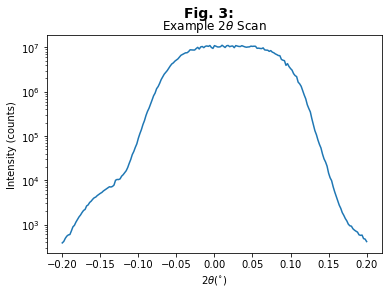

In [6]:
display(tag)
df_2theta = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/2th_stb.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 3:', fontsize=14, fontweight='bold')
plt.title('Example $2\\theta$ Scan')
plt.plot(df_2theta[df_2theta.columns[0]],df_2theta[df_2theta.columns[1]]*df_2theta[df_2theta.columns[2]])
plt.yscale('log')
plt.xlabel("$2\\theta$($^{\circ}$)")
plt.ylabel(df_2theta.columns[1]+" (counts)")
plt.show()

### Follow the instructions and put a check mark in each step as you advance. These steps are to align the thin film sample in preparation for measurements.

In [7]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

alignment_guidance = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Manual Control, select $Z$ from the Axis list. Make sure slits are the same as they were for the $2\\theta$ scan. These slit values were determined specifically for your lab experiment. The reduced intensity caused by the monochromator will be somewhat mitigated by larger slits (compared to the XRR experiment). Ask your supervisor for more information.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample. <b><i>NOTE:</b> The units for the scan speed will actually be mm/min even though the template shows deg/min.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. You can read off the $Z$ postion values by moving the cross hairs in the Display Area. Move the $Z$ position to the halfway point of this "drop" by entering the $Z$ value you read off in the Move box and clicking Move (i.e. when the incoming beam reaches half its intensity).',
            'Select R$_y$ from the Axis List. Check the option Move to Peak.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be labeled with a red X.',
            'Now perform another $Z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Notice, your most recent scan will be colored RED. Again, move to the same "halfway" point',
            'Save $Z$ scan by clicking on the save icon ("floppy disk"). Save in your netID directory in the following format: "z_stb.ras".',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section above. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)',
            'Now, move the sample out of the way of the incoming beam (i.e. move the sample down 2 mm). Perform a $2\\theta / \chi$ scan [relative -$2.5$ to $2.5$ deg, step = $0.05$ deg, speed = $5$ deg/min]. Move to the center of the peak. This is the first time you have used the $\chi$ motor in your lab experiments. Refer to the diffractometer figure above to understand how $\chi$ is defined.']


# To do list containing all the steps for XRR on SmartLab Gen 2
alignment_studio = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Pro Control, select $Z$ from the Axis list. Make sure slits are the same as they were for the $2\\theta$ scan. These slit values were determined specifically for your lab experiment. The reduced intensity caused by the monochromator will be somewhat mitigated by larger slits (compared to the XRR experiment). Ask your supervisor for more information.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. You can read off the $Z$ postion values by moving the cross hairs in the Display Area. Move the $Z$ position to the halfway point of this "drop" by entering the $Z$ value you read off in the Move box and clicking Move (i.e. when the incoming beam reaches half its intensity).',
            'Select R$_y$ from the Axis List. Check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select Full Width at Half Maximum Center (or Maxium Intensity) for Peak Search Method. Click $\\text{Ok}$.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be shown with a RED point. We will continuously use this SmartLab feature throughout the lab.',
            'Select the $Z$ tab and check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select Edge Search for peak search method. Click $\\text{Ok}$.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform another $Z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Click on Scan to start. Notice, your most recent scan will be colored RED.',  
            'Save $Z$ scan. Right click on your last $Z$ scan in Data Browser. Select $\\text{Export data}\\to\\text{to File}$ and save in your netID directory in the following format: "z_stb.ras". <i><b>NOTE: </b> Make sure to save the scan in the "ras" format, NOT "rasx". </i>',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section above. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)',
            'Now, move the sample out of the way of the incoming beam (i.e. move the sample down 2 mm). Perform a $2\\theta / \chi$ scan [relative -$2.5$ to $2.5$ deg, step = $0.05$ deg, speed = $5$ deg/min]. Move to the center of the peak. This is the first time you have used the $\chi$ motor in your lab experiments. Refer to the diffractometer figure above to understand how $\chi$ is defined.']

if (machine_toggle_1.value):
    step_list_alignment = alignment_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_alignment = alignment_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_alignment= []
for step in step_list_alignment:
    step_index = str(step_list_alignment.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_alignment.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb2 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_alignment:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_alignment.index(checkbox)+1))
            pb2.button_style='danger'
    if steps_completed == len(checkbox_array_alignment):
        print("You finished Sample Alignment. Good Job! Now we are ready to perform High Resolution X-ray Diffraction (HRXRD) on our sample.")
        pb2.button_style='success'
        
pb2.on_click(on_button_clicked)
display(pb2)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='In Pro Contr…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Make sure Au…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Perform an A…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='The scan sho…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Perform a R$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Make sure Au…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Perform ano…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Save $Z$ sc…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>12:'), HTMLMath(value='Record the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>13:'), HTMLMath(value='Now, move t…

Button(button_style='info', description='Finish!', style=ButtonStyle())

## Aligning to the Substrate for In Plane Measurements

In order to perform in-plane scans (i.e. $\phi$ scans), we first have to make sure that the $c$-axis sample is along the $\phi$ axis. That way, when we rotate in $\phi$, we remain in the plane of interest as the sample normal is along the $\phi$ axis. To perform this alignment, we perform successive $\omega$ scans at different $\phi$ values and adjust R$_x$ and R$_y$ accordingly. We are rocking the sample back and forth until the normal is aligned with the $\phi$ axis.

These next alignment steps are crucial for the success of the experiment. Read the instructions carefully and ask your lab supervisor for assistance if you are confused or having difficulty. Fill in the table below as you go through the steps to help keep track of different values. To do this, show the cell's raw code input and enter your values for the appropriate parameters as you progress through the step list.

In [31]:
display(tag)
# Enter your measured values for the parameters below

# For aligning phi (omega scans (+/- 0.05, 0.0008,.8), Ry (+/- 1, 0.01, 4), Rx(+/- 2, 0.05, 4))
Ry_1 = -0.076
Rx_1 = 0
omega_phi0 = 20.8606
omega_phi180 = 20.9164
omega_new = 20.888 # at Ry = Ry_2
omega_phi90 = 21.0179
omega_phi270 = 20.7578
omega_phi0_2 = 20.8854
omega_phi180_2 = 20.8908
omega_final = 20.887



# updating Ry value based on omega scans
if omega_phi180>omega_phi0:
    Ry_2 =  round(Ry_1 - (omega_phi180 - omega_phi0)/2,4)
else:
    Ry_2 =  round(Ry_1 + (omega_phi180 - omega_phi0)/2,4)
    
# updating Rx value based on omega scans
if omega_phi270>omega_phi90:
    Rx_2 = round(Rx_1 - (omega_phi270-omega_phi90)/2,4)
else:
    Rx_2 = round(Rx_1 + (omega_phi270-omega_phi90)/2,4)
#Then do omega scan at phi = 0 and Rx_new and Ry_new (20.8854)
#Then do omega scan at phi = 180 and Rx_new and Ry_new (20.8908)
if omega_phi180_2>omega_phi0_2:
    Ry_3 = round(Ry_2 - (omega_phi180_2 - omega_phi0_2)/2,4)
else:
    Ry_3 = round(Ry_2 + (omega_phi180_2 - omega_phi0_2)/2,4)
# Then do omega scan at phi = 0

# Tables displaying the calculations as you go through the alignment steps
n0 = Markdown("These tables correspond to the tables shown in the step list below. The default values should be changed based on your own measurements.")

t1 = Markdown("|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) | \
         \n|------|------|------|-----|\
         \n|   {} | {}|{}|{}|\
         \n|   {} | {}|{}|{}|".format(0,omega_phi0,Ry_1,Rx_1,180,omega_phi180,Ry_1,Rx_1))

n1 = Markdown("The value of R$_y$ is now updated based on the average of the two $\omega$ scans at $\phi=0\\text{, } 180$.")

t2 = Markdown("|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) | \
         \n|------|------|------|-----|\
         \n|   {} | {}|{}|{}|\
         \n|   {} | {}|{}|{}|\
         \n|   {} | {}|{}|{}|".format(0, omega_new,Ry_2,Rx_1, 90, omega_phi90,Ry_2,Rx_1,270, omega_phi270,Ry_2,Rx_1))

n2 = Markdown("The value of R$_x$ is now updated based on the average of the two $\omega$ scans at $\phi=90\\text{, } 270$.")

t3 = Markdown("|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) | \
         \n|------|------|------|-----|\
         \n|   {} | {}|{}|{}|\
         \n|   {} | {}|{}|{}|".format(0, omega_phi0_2,Ry_2,Rx_2, 180, omega_phi180_2,Ry_2,Rx_2))

n3 = Markdown("The value of R$_y$ is now updated again based on the average of the two most recent $\omega$ scans at $\phi=0\\text{, } 180$. The table belows shows your final values for R$_y$, R$_x$, and $\omega$. We <strong>never</strong> move these values again (THIS IS VERY PRECISE ALIGNMENT).")

t4 = Markdown("|$\omega$($\circ$) Final | R$_y$ Final ($\circ$) | R$_x$ Final ($\circ$) | \
         \n|------|------|-----|\
         \n|   {} | {}|{}|".format(omega_final,Ry_3,Rx_2))

display(n0,t1,n1,t2,n2,t3,n3,t4)

These tables correspond to the tables shown in the step list below. The default values should be changed based on your own measurements.

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 20.8606|-0.076|0|         
|   180 | 20.9164|-0.076|0|

The value of R$_y$ is now updated based on the average of the two $\omega$ scans at $\phi=0\text{, } 180$.

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 20.888|-0.1039|0|         
|   90 | 21.0179|-0.1039|0|         
|   270 | 20.7578|-0.1039|0|

The value of R$_x$ is now updated based on the average of the two $\omega$ scans at $\phi=90\text{, } 270$.

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 20.8854|-0.1039|-0.1301|         
|   180 | 20.8908|-0.1039|-0.1301|

The value of R$_y$ is now updated again based on the average of the two most recent $\omega$ scans at $\phi=0\text{, } 180$. The table belows shows your final values for R$_y$, R$_x$, and $\omega$. We <strong>never</strong> move these values again (THIS IS VERY PRECISE ALIGNMENT).

|$\omega$($\circ$) Final | R$_y$ Final ($\circ$) | R$_x$ Final ($\circ$) |          
|------|------|-----|         
|   20.887 | -0.1066|-0.1301|

### Follow the instructions and put a check mark in each step as you advance. These steps are to measure the (006) diffraction peak of the substrate (Al$_2$O$_3$) and align in R$_x$ and R$_y$ such that the $\phi$ axis is along the direction of the $c$-axis of the substrate.

In [9]:
display(tag)
#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

step_list_sub_guidance = ['Select the $2\\theta$/$\omega$ axis  in Manual Control. Move to the substrate peak (you should now know this location having completed Lab 2).',
            'Select the $\omega$ axis in Manual Control. Make sure Automatic Attenuator is on.',
            'Make sure $\phi = 0^{\circ}$. Perform an $\omega$ scan [Relative -.05 to .05, step=0.0008 deg/step, speed=.8 deg/min]. Note down the location of the peak.',
            'Now move $\phi$ to $180^{\circ}$. Perform the same $\omega$ scan. Note down the location of the peak. The table below shows what you have done so far.',
            'We now want to update our R$_y$ based on these $\omega$ scans. Notice how the peak shifts after rotating in $\phi$. If the sample normal was along the $\phi$ axis, this would not happen. We want to update our R$_y$ value (which is the same direction as $\omega$) to go in between these two peaks. This is done by offsetting R$_y$ by difference of the $\omega$ peak values divided by 2 (i.e. R$_{y\\text{, new}}$ = R$_{y\\text{,initial}}$ $\pm$ $\\frac{\Delta \omega}{2}$). The $+/-$ depends on whether your second peak is located to the left/right of your first peak, respecitively. If you enter your measurements in the cell above and run the cell, this value will be calculated for you. Move R$_y$ to this value.',   
            'Perform an $\omega$ scan at the updated R$_y$ value at $\phi = 0$. Move to the center and note down the location of the peak.',
            'Select the R$_x$ axis in Pro Control. We are now going to perform the same steps for R$_x$ as we did for R$_y$ only at $\phi = 90^{\circ}$ and $\phi = 270^{\circ}$. Note: R$_x$ is equivalent to R$_y$ when $\phi$ is rotated by $90^{\circ}$. Therefore, now $\omega$ will not be rotating along the same axis as R$_x$. The table belows shows what measurements you should perform.',
            'Update the value for R$_x$ based on the two $\omega$ scans at $\phi = 90^{\circ},270^{\circ}$ as you did in <strong> Step 5 </strong> for R$_{y}$.',
            'We are now going to repeat the alignment for R$_y$. Perform $\omega$ scans at the updated values for R$_y$ and R$_x$ at both $\phi = 0^{\circ}$ and $\phi = 180^{\circ}$. The table below shows those scans.',
            'Update your R$_y$ value again based on these two most recent $\omega$ scans at $\phi = 0^{\circ}$ and $\phi = 180^{\circ}$',
            'Finally, perform an $\omega$ scan at this new value of R$_y$ and $\phi = 0^{\circ}$. Move to the center. The table belows shows your final values for R$_y$, R$_x$, and $\omega$. We <strong>never</strong> move these values again (THIS IS VERY PRECISE ALIGNMENT).']

# To do list containing all the steps for HRXRD
step_list_sub_studio = ['Select the $2\\theta$/$\omega$ axis  in Pro Control. Move to the substrate peak (you should now know this location having completed Lab 2).',
            'Select the $\omega$ axis in Pro Control. Make sure Automatic Attenuator is on.',
            'Make sure $\phi = 0^{\circ}$. Perform an $\omega$ scan [Relative -.05 to .05, step=0.0008 deg/step, speed=.8 deg/min]. Note down the location of the peak.',
            'Now move $\phi$ to $180^{\circ}$. Perform the same $\omega$ scan. Note down the location of the peak. The table below shows what you have done so far.',
            'We now want to update our R$_y$ based on these $\omega$ scans. Notice how the peak shifts after rotating in $\phi$. If the sample normal was along the $\phi$ axis, this would not happen. We want to update our R$_y$ value (which is the same direction as $\omega$) to go in between these two peaks. This is done by offsetting R$_y$ by difference of the $\omega$ peak values divided by 2 (i.e. R$_{y\\text{, new}}$ = R$_{y\\text{,initial}}$ $\pm$ $\\frac{\Delta \omega}{2}$). The $+/-$ depends on whether your second peak is located to the left/right of your first peak, respecitively. If you enter your measurements in the cell above and run the cell, this value will be calculated for you. Move R$_y$ to this value.',   
            'Perform an $\omega$ scan at the updated R$_y$ value at $\phi = 0$. Move to the center and note down the location of the peak.',
            'Select the R$_x$ axis in Pro Control. We are now going to perform the same steps for R$_x$ as we did for R$_y$ only at $\phi = 90^{\circ}$ and $\phi = 270^{\circ}$. Note: R$_x$ is equivalent to R$_y$ when $\phi$ is rotated by $90^{\circ}$. Therefore, now $\omega$ will not be rotating along the same axis as R$_x$. The table belows shows what measurements you should perform.',
            'Update the value for R$_x$ based on the two $\omega$ scans at $\phi = 90^{\circ},270^{\circ}$ as you did in <strong> Step 5 </strong> for R$_{y}$.',
            'We are now going to repeat the alignment for R$_y$. Perform $\omega$ scans at the updated values for R$_y$ and R$_x$ at both $\phi = 0^{\circ}$ and $\phi = 180^{\circ}$. The table below shows those scans.',
            'Update your R$_y$ value again based on these two most recent $\omega$ scans at $\phi = 0^{\circ}$ and $\phi = 180^{\circ}$',
            'Finally, perform an $\omega$ scan at this new value of R$_y$ and $\phi = 0^{\circ}$. Move to the center. The table belows shows your final values for R$_y$, R$_x$, and $\omega$. We <strong>never</strong> move these values again (THIS IS VERY PRECISE ALIGNMENT).']

if (machine_toggle_1.value):
    step_list_sub = step_list_sub_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_sub = step_list_sub_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_sub = []
for step in step_list_sub:
    step_index = str(step_list_sub.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_sub.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80%',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    if step_list_sub.index(step)+1 == 4:
        display(t1)
    if step_list_sub.index(step)+1 == 7:
        display(t2)
    if step_list_sub.index(step)+1 == 9:
        display(t3)
    if step_list_sub.index(step)+1 == 11:
        display(t4)
    
#create finish button that verifies all steps have been completed
pb4 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_sub:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_sub.index(checkbox)+1))
            pb4.button_style='danger'
    if steps_completed == len(checkbox_array_sub):
        print("This is a very precise alignment. Nice job on completing the steps!")
        pb4.button_style='success'
        
pb4.on_click(on_button_clicked)
display(pb4)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Make sure $\…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Now move $\\…

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 20.8606|-0.076|0|         
|   180 | 20.9164|-0.076|0|

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='We now want …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Perform an $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Select the R…

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 20.888|-0.1039|0|         
|   90 | 21.0179|-0.1039|0|         
|   270 | 20.7578|-0.1039|0|

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Update the v…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='We are now g…

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 20.8854|-0.1039|-0.1301|         
|   180 | 20.8908|-0.1039|-0.1301|

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Update your…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Finally, pe…

|$\omega$($\circ$) Final | R$_y$ Final ($\circ$) | R$_x$ Final ($\circ$) |          
|------|------|-----|         
|   20.887 | -0.1066|-0.1301|

Button(button_style='info', description='Finish!', style=ButtonStyle())

## 3. Performing HRXRD (Off-Specular)

Now we move to Bragg peak for the off-specular reflection (for example, $2\theta/\omega$ = 35.135 for the ($\bar{1}14$) reflection of $\text{Al}_2\text{O}_3$). We also need to move $\chi$ to the appropriate elevation value for this reflection. The (hkl) incidices, the $2\theta/\omega$ value, and the $\chi$ value of the appropriate off-specular reflection plane are found using CrystalMaker and SingleCrystal.

### Follow the instructions and put a check mark in each step as you advance. These steps are to measure off-specular reflection of your substrate and film.

In [27]:
display(tag)
#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

step_list_off_spec_guidance = ['First we will look at the substrate. In Manual Control, select the $\chi$ axis. Move to the appropriate $\chi$ position for the substrate based on the elevation value you found in SingleCrystal $(\chi = 90^{\circ} - \\text{elevation})$.',
            'Select the $2\\theta$/$\omega$ axis  in Pro Control. Move to the expected off-specular peak position for the substrate.',
            'We are now going to perform an in-plane scan. Select the $\phi$ axis in Pro Control. Make sure Automatic Attenuator is on. Do a coarse $\phi$ scan [Absolute 0 to 360 deg, step=0.03 deg, speed=36 deg/min ]. You should see peaks appearing as we rotate all the way around in $\phi$ based on the symmetry of your reflection (e.g. the $(\\bar{1}14)$ reflection of $\\text{Al}_2\\text{O}_3$ has 3-fold symmetry and we see 3 peaks)',
            'Move to the highest intensity peak and perform a relative $\phi$ scan [+/- 1 deg, step=0.004, speed=2 deg/min]. Move to the center.',
            'Save the previous $\phi$ scan: "PHI_FINE_Al2O3.ras"',
            'Now we want to optimize $2\\theta/\omega$ and $\chi$ values. Perform a relative $2\\theta/\omega$ scan [+/- 0.25, step=0.008, speed=0.5)]. Move to center.',
            'Perform a relative $\chi$ scan [+/- 1, step=0.01, speed=3)]. Move to center.',   
            'After optimization, repeat your $\phi$ scan. Save the scan: "PHI_FULL_Al2O3.ras".',
            'Repeat steps 1-7 for your film. Remember, you have to adjust $2\\theta/\omega$ and $\chi$ based on what you found in SingleCrystal for your film.']

# To do list containing all the steps for HRXRD
step_list_off_spec_studio = ['First we will look at the substrate. In Pro Control, select the $\chi$ axis. Move to the appropriate $\chi$ position for the substrate based on the elevation value you found in SingleCrystal $(\chi = 90^{\circ} - \\text{elevation})$.',
            'Select the $2\\theta$/$\omega$ axis  in Pro Control. Move to the expected off-specular peak position for the substrate.',
            'We are now going to perform an in-plane scan. Select the $\phi$ axis in Pro Control. Make sure Automatic Attenuator is on. Do a coarse $\phi$ scan [Absolute 0 to 360 deg, step=0.03 deg, speed=36 deg/min ]. You should see peaks appearing as we rotate all the way around in $\phi$ based on the symmetry of your reflection (e.g. the $(\\bar{1}14)$ reflection of $\\text{Al}_2\\text{O}_3$ has 3-fold symmetry and we see 3 peaks)',
            'Move to the highest intensity peak and perform a relative $\phi$ scan [+/- 1 deg, step=0.004, speed=2 deg/min]. Move to the center.',
            'Save the previous $\phi$ scan: "PHI_FINE_Al2O3.ras"',
            'Now we want to optimize $2\\theta/\omega$ and $\chi$ values. Perform a relative $2\\theta/\omega$ scan [+/- 0.25, step=0.008, speed=0.5)]. Move to center.',
            'Perform a relative $\chi$ scan [+/- 1, step=0.01, speed=3)]. Move to center.',   
            'After optimization, repeat your $\phi$ scan. Save the scan: "PHI_FULL_Al2O3.ras".',
            'Repeat steps 1-7 for your film. Remember, you have to adjust $2\\theta/\omega$ and $\chi$ based on what you found in SingleCrystal for your film.']

if (machine_toggle_1.value):
    step_list_off_spec = step_list_off_spec_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_off_spec = step_list_off_spec_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_off_spec = []
for step in step_list_off_spec:
    step_index = str(step_list_off_spec.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_off_spec.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80%',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb5 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_off_spec:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_off_spec.index(checkbox)+1))
            pb5.button_style='danger'
    if steps_completed == len(checkbox_array_off_spec):
        print("Congrats on performing off-specular X-ray diffraction!")
        pb5.button_style='success'
        
pb5.on_click(on_button_clicked)
display(pb5)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='First we wil…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='We are now g…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Move to the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Save the pre…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Now we want …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Perform a re…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='After optimi…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Repeat steps…

Button(button_style='info', description='Finish!', style=ButtonStyle())

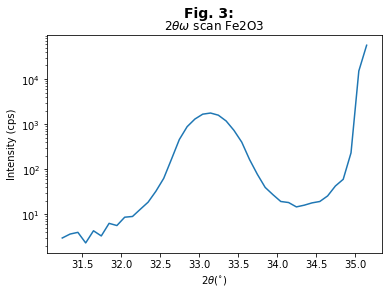

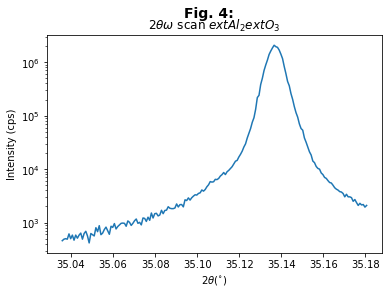

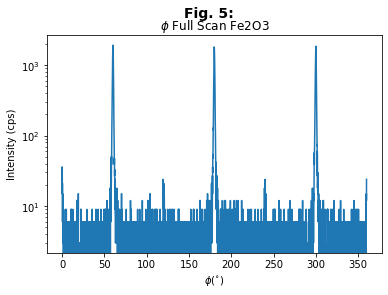

In [11]:
#Reading in example data files

display(tag)
df_2tw_fe2o3 = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/Off_Specular_Lab/2TW_Fe2O3_014_0014_Scan2020Sep10-193543.dat',sep = '\s+',comment='*',names = ["2TH","Intensity"],header = 1)
plt.figure()
plt.suptitle('Fig. 3:', fontsize=14, fontweight='bold')
plt.title('$2\\theta\omega$ scan Fe2O3')
plt.plot(df_2tw_fe2o3[df_2tw_fe2o3.columns[0]],df_2tw_fe2o3[df_2tw_fe2o3.columns[1]])
plt.yscale('log')
plt.xlabel("2$\\theta$($^{\circ}$)")
plt.ylabel(df_2tw_fe2o3.columns[1]+" (cps)")
plt.show()

df_2tw_al2o3 = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/Off_Specular_Lab/2TW_Al2O3_014_0012_Scan2020Sep10-174204.dat',sep = '\s+',comment='*',names = ["2TH","Intensity"],header = 1)
plt.figure()
plt.suptitle('Fig. 4:', fontsize=14, fontweight='bold')
plt.title('$2\\theta\omega$ scan $\text{Al}_2\text{O}_3$')
plt.plot(df_2tw_al2o3[df_2tw_al2o3.columns[0]],df_2tw_al2o3[df_2tw_al2o3.columns[1]])
plt.yscale('log')
plt.xlabel("2$\\theta$($^{\circ}$)")
plt.ylabel(df_2tw_al2o3.columns[1]+" (cps)")
plt.show()


df_2tw_phi_full_fe2o3 = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/Off_Specular_Lab/PHIFULL_Fe2O3_014_0007_Scan2020Sep10-194250.dat',sep = '\s+',comment='*',names = ["2TH","Intensity"],header = 1)
plt.figure()
plt.suptitle('Fig. 5:', fontsize=14, fontweight='bold')
plt.title('$\phi$ Full Scan Fe2O3')
plt.plot(df_2tw_phi_full_fe2o3[df_2tw_phi_full_fe2o3.columns[0]],df_2tw_phi_full_fe2o3[df_2tw_phi_full_fe2o3.columns[1]])
plt.yscale('log')
plt.xlabel("$\phi$($^{\circ}$)")
plt.ylabel(df_2tw_phi_full_fe2o3.columns[1]+" (cps)")
plt.show()

# GUIDE AND NOTES ON PERFORMING OFF SPECULAR

Do rough $\phi$ scan from 0 to 360 (10 minute scan, 0.03 step, 36 deg/min)

Go to highest intensity phi peak. Do fine $\phi$ scan (+/- 1 deg, 0.004 step, 2 deg/min). Optimize $2\theta/\omega$ (+/- 0.25, 0.008, 0.5), $\chi$ (+/- 1, 0.01, 3). Do fine $\phi$ scan of that single peak. Run complete $\phi$ scan again (0 to 360, 0.032, 36).

Now do it for the film, steps are the same only we will move to a different $2\theta/\omega$ and $\chi$ based on film crystal maker stuff (find $2\theta/\omega$ and elevation (33.1155 and 51.8 for Fe2O3))

For $\phi$ scans (+/- 2, step 0.05, 2deg/min)

## Example 
10nm Fe2O3

2$\theta_{0}$ = 0.017

2$\theta\chi_0$ = -0.206

$Z$ = -0.940

Rx, Ry, and $\omega$ shown below.

$\phi_{\text{peak}}$ =73.37 (saphhire)

$\phi_{\text{peak}}$ = 73.83 (hematitie) (100cps)


### Measured for Fe_2O_3 10nm
Ry_1 = -0.076 \
Rx_1 = 0 \
omega_phi0 = 20.8606 \
omega_phi180 = 20.9164 \
omega_new = 20.888 # at Ry = Ry_2 \
omega_phi90 = 21.0179 \
omega_phi270 = 20.7578 \
omega_phi0_2 = 20.8854 \
omega_phi180_2 = 20.8908 \
omega_final = 20.887 \